In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

# Stay classification: cluster-splitting with box-refinement & shifting boxes

**24.08.2020**

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [5]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from synthetic_data.trajectory_class import get_pickle_trajectory
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from stay_classification.metric_box_classifier.metric_box_classifier import stay_classifier_testing
from helper__metric_box__explore import eval_synth_data

# Start here

In [7]:
dsec = 1/3600.0
t_total = np.arange(0,24,dsec)

In [8]:
time_thresh = 1/6
dist_thresh=0.25

In [9]:
data_dir = f"./testdata_training_set__canonical_3stays/"

In [13]:
lens = []
precs = []
recs = []

lens3 = []
precs3 = []
recs3 = []

bad_list = []

precrec_limit = 0.80

ii = 0

length_criterion_break = False
iqr_trim = False
verbose = False

total = 1000

for ii in range(0, total):
    
    # Load the data
    trajectory_tag = f"trajectory{ii}_{3}stays"    
    path_to_file =  data_dir + trajectory_tag
    time_arr, raw_arr, noise_arr, segments = get_pickle_trajectory(path_to_file)
    t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

    # Get the stay clusters
    all_clusters = stay_classifier_testing(time_arr, noise_arr, dist_thresh, time_thresh, verbose)
    
    # Make some measurements
    final_len=len(all_clusters[-1])
    prec, rec, conmat = eval_synth_data(segments, time_arr, all_clusters[-1])
    
    stays_tag = int((x_segs.size)/3)
    
    len_all_clusts = len(all_clusters)

    if final_len != stays_tag:
        lens.append(final_len)
        precs.append(prec)
        recs.append(rec)
    else:
        lens3.append(final_len)
        precs3.append(prec)
        recs3.append(rec)
    
    if ii % int(0.1*total) == 0:
        print(f"{ii:4d} of {total:5d}")


   0 of  1000
 100 of  1000
 200 of  1000
 300 of  1000
 400 of  1000
 500 of  1000
 600 of  1000
 700 of  1000
 800 of  1000
 900 of  1000


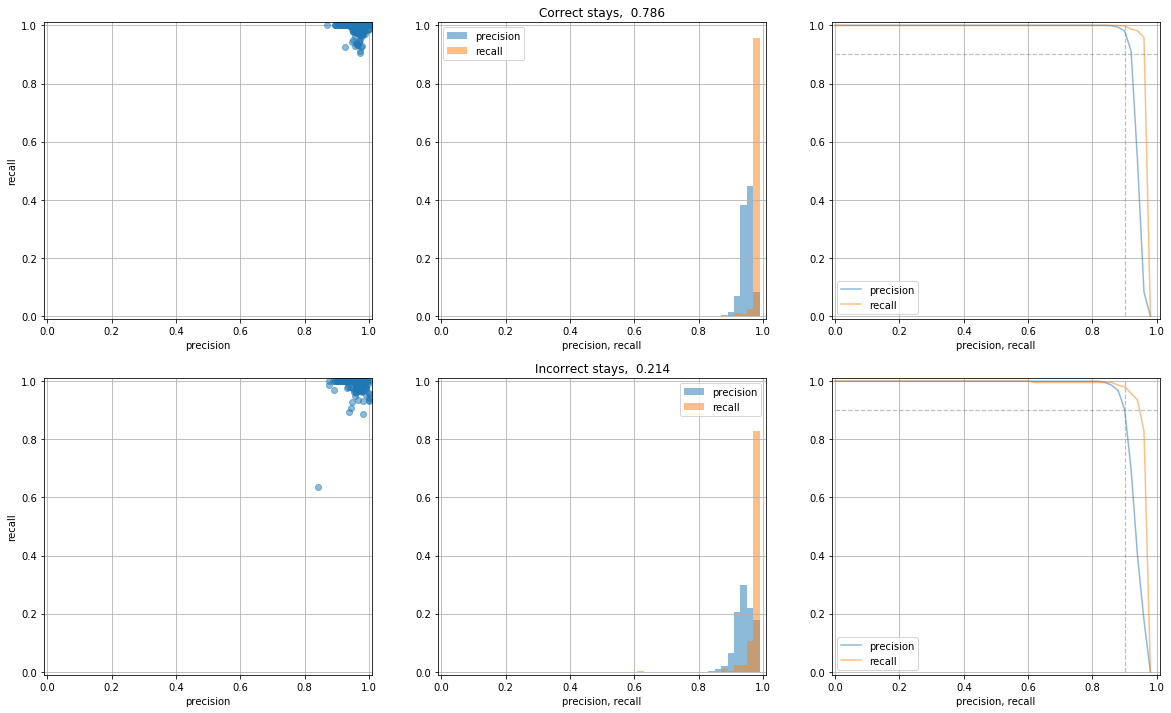

In [14]:
fig, axs = plt.subplots(2,3, figsize=[20,12])
axs = axs.flatten()
ax =axs[0]
ax.plot(precs3, recs3, 'o', alpha=0.5)
lims=[-.01,1.01]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("precision")
ax.set_ylabel("recall")
ax.grid()

binw=0.02
bins=np.arange(0.0,1.0+binw,binw)
hp, _ = np.histogram(np.array(precs3), bins=bins, density=True)
hr, _ = np.histogram(np.array( recs3), bins=bins, density=True)

ax = axs[1]
_ = ax.bar(bins[:-1], hp*binw, alpha=0.5, width=binw, align='center', label="precision")
_ = ax.bar(bins[:-1], hr*binw, alpha=0.5, width=binw, align='center', label="recall")
ax.set_xlabel("precision, recall")
ax.set_title(f"Correct stays, {len(lens3)/total:6.3f}")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.grid()
ax.legend();

ax = axs[2]
_ = ax.plot(bins[:-1], 1-np.cumsum(hp*binw), alpha=0.5,label="precision")
_ = ax.plot(bins[:-1], 1-np.cumsum(hr*binw), alpha=0.5,label="recall")
ax.plot([0.9,0.9],[0,1], '--', color='gray', lw=1.2, alpha=0.5)
ax.plot([0,1],[0.9,0.9], '--', color='gray', lw=1.2, alpha=0.5)
ax.set_xlabel("precision, recall")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.grid()
ax.legend()

ax =axs[3]
ax.plot(precs, recs, 'o', alpha=0.5)
lims=[-.01,1.01]
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("precision")
ax.set_ylabel("recall")
ax.grid()

binw=0.02
bins=np.arange(0.0,1.0+binw,binw)
hp, _ = np.histogram(np.array(precs), bins=bins, density=True)
hr, _ = np.histogram(np.array( recs), bins=bins, density=True)

ax = axs[4]
_ = ax.bar(bins[:-1], hp*binw, alpha=0.5, width=binw, align='center', label="precision")
_ = ax.bar(bins[:-1], hr*binw, alpha=0.5, width=binw, align='center', label="recall")
ax.set_xlabel("precision, recall")
ax.set_title(f"Incorrect stays, {len(lens)/total:6.3f}")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.grid()
ax.legend();

ax = axs[5]
_ = ax.plot(bins[:-1], 1-np.cumsum(hp*binw), alpha=0.5,label="precision")
_ = ax.plot(bins[:-1], 1-np.cumsum(hr*binw), alpha=0.5,label="recall")
ax.plot([0.9,0.9],[0,1], '--', color='gray', lw=1.2, alpha=0.5)
ax.plot([0,1],[0.9,0.9], '--', color='gray', lw=1.2, alpha=0.5)
ax.set_xlabel("precision, recall")
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.grid()
ax.legend();
fig.savefig(data_dir + "metrics_x.png")